In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/xor_dataset.csv')

After uploading, the file will be available in the current session's file system. You can then use `pd.read_csv('xor_dataset.csv')` to load it.

In [ ]:
df.head()

,X1,X2,Label
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


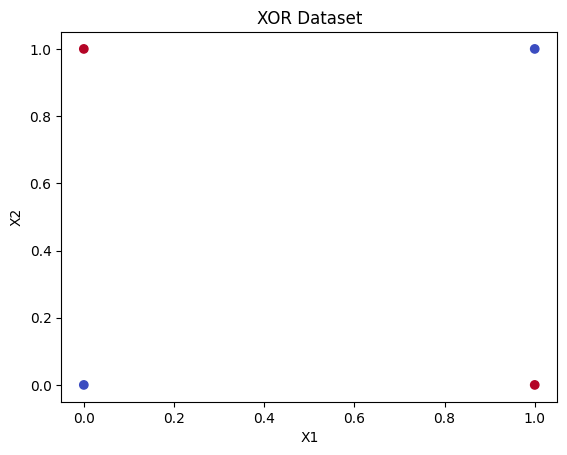

In [ ]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Dataset")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(
    units=2,
    activation='relu',
    input_shape=(2,)
))

model.add(Dense(
    units=1,
    activation='sigmoid'
))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X, y,
    epochs=50,
    verbose=1
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step - accuracy: 0.7500 - loss: 0.6656
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.6654
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.6653
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 0.6651
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6649
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.6648
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7500 - loss: 0.6646
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6644
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.6642
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7500 - loss: 0.6641
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6639
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.6637


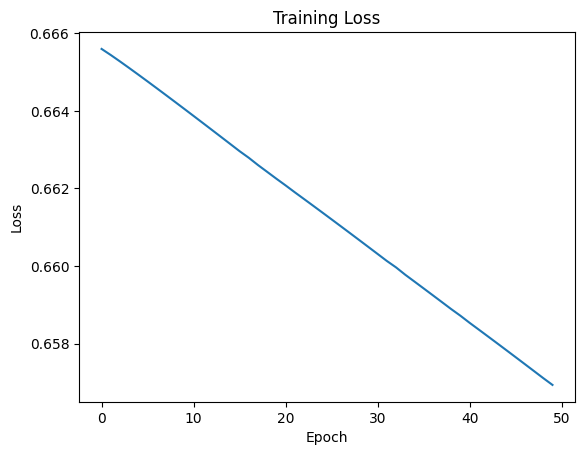

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [ ]:
import numpy as np

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid)
preds = preds.reshape(xx.shape)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step


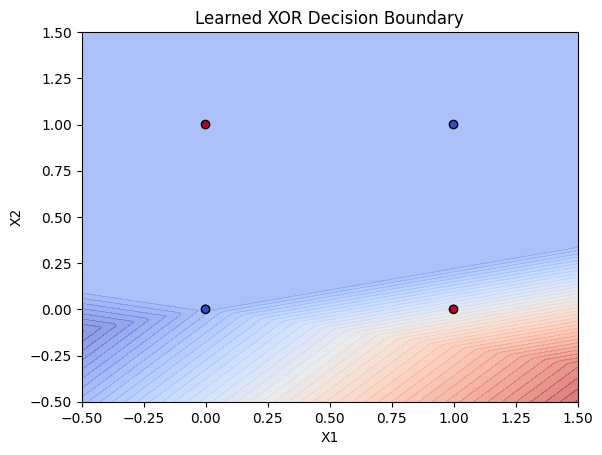

In [ ]:
plt.contourf(xx, yy, preds, levels=50, cmap="coolwarm", alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Learned XOR Decision Boundary")
plt.show()